**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



**Check: region directory**

In [2]:
txt_fdiry = file.path(FD_RES, "region_coverage_fcc_score")

vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

atac_ENCFF333TAT 
atac_ENCFF558BLC 
atac_ENCFF925CYR 
atac_ENCFF948AFM 
dnase_ENCFF185XRG 
dnase_ENCFF274YGF 
fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


**Check: assay directory**

In [3]:
txt_region = "fcc_astarr_macs_input_union"
txt_fdiry  = file.path(FD_RES, "region_coverage_fcc_score", txt_region)
vec = dir(txt_fdiry)
for (txt in vec) {cat(txt, "\n")}

CRISPRi_FlowFISH_K562_Riley_JinWoo 
CRISPRi_Growth_K562_Gersbach_JinWoo 
MPRA_Lenti_K562_Nadav_Vikram 
MPRA_Tiling_K562_Tewhey_Hannah 
STARR_ATAC_K562_Reddy_KS274 
STARR_ATAC_K562_Reddy_KS91 
STARR_ATAC_K562_Reddy_KSMerge 
STARR_WHG_K562_Reddy_A001 
summary 


**Set global variable**

In [4]:
## init: region folder
vec = c("fcc_astarr_macs_input_overlap", "fcc_astarr_macs_input_union")
names(vec) = vec

VEC_TXT_FOLDER = vec
for (txt in vec) {cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


## Import data

### Import STARR/MPRA RankNorm

**Check files**

In [5]:
txt_folder = VEC_TXT_FOLDER[1]
txt_fdiry  = file.path(FD_RES, "analysis_fcc_correlation", txt_folder)
txt_fname  = "region.coverage.ranknorm.*.tsv"
txt_fglob  = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for (txt in vec) {cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/analysis_fcc_correlation/fcc_astarr_macs_input_overlap/region.coverage.ranknorm.aggregate.starrmpracrispr.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/analysis_fcc_correlation/fcc_astarr_macs_input_overlap/region.coverage.ranknorm.overlap.starrmpracrispr.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/analysis_fcc_correlation/fcc_astarr_macs_input_overlap/region.coverage.ranknorm.overlap.starrmpra.tsv 


**Read tables**

In [6]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry  = file.path(FD_RES, "analysis_fcc_correlation", txt_folder)
    txt_fname = "region.coverage.ranknorm.overlap.starrmpra.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_ranknorm_starrmpra_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
fun_display_table(head(dat, 3))

$fcc_astarr_macs_input_overlap
[1] 3376    8

$fcc_astarr_macs_input_union
[1] 4948    8



Chrom,ChromStart,ChromEnd,Region,Assay,Score,RankNorm,Mean
chr11,4551522,4551988,chr11:4551522-4551988,ASTARR,0.3415507,0.7425860,0.4850237
chr11,4554256,4554817,chr11:4554256-4554817,ASTARR,0.0795268,0.5871886,0.8161329
chr11,4607720,4608631,chr11:4607720-4608631,ASTARR,0.4768911,0.8007117,0.6684460


### Import STARR/MPRA Scores

**Check files**

In [7]:
txt_folder = VEC_TXT_FOLDER[1]
txt_fdiry  = file.path(FD_RES, "region_coverage_fcc_score", txt_folder, "summary")
txt_fname  = "region.coverage.score.fcc.*.tsv"
txt_fglob  = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for (txt in vec) {cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_coverage_fcc_score/fcc_astarr_macs_input_overlap/summary/region.coverage.score.fcc.final.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_coverage_fcc_score/fcc_astarr_macs_input_overlap/summary/region.coverage.score.fcc.test.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_coverage_fcc_score/fcc_astarr_macs_input_overlap/summary/region.coverage.score.fcc.total.tsv 


**Read tables**

In [8]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry  = file.path(FD_RES, "region_coverage_fcc_score", txt_folder, "summary")
    txt_fname = "region.coverage.score.fcc.final.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_score_fcc_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
fun_display_table(head(dat, 3))

$fcc_astarr_macs_input_overlap
[1] 432928     11

$fcc_astarr_macs_input_union
[1] 639718     11



Chrom,ChromStart,ChromEnd,Region,Score,Zcore,Score_Label,Zcore_Label,Assay_Folder,Assay_Group,Assay_Label
chr1,10038,10405,chr1:10038-10405,-2.2348526,-3.5573621,Log2FC,Scale(Log2FC),STARR_ATAC_K562_Reddy_KS91,ASTARR_KS91,ASTARR
chr1,14282,14614,chr1:14282-14614,0.0317904,0.0361388,Log2FC,Scale(Log2FC),STARR_ATAC_K562_Reddy_KS91,ASTARR_KS91,ASTARR
chr1,16025,16338,chr1:16025-16338,-1.3393406,-2.1376311,Log2FC,Scale(Log2FC),STARR_ATAC_K562_Reddy_KS91,ASTARR_KS91,ASTARR


### Import CRISPRi-HCRFF Scores

**Check files**

In [9]:
txt_assay = "CRISPRi_FlowFISH_K562_Riley_JinWoo"
txt_folder = VEC_TXT_FOLDER[1]
txt_fdiry  = file.path(FD_RES, "region_coverage_fcc_score", txt_folder, txt_assay, "summary")

vec = dir(txt_fdiry)
for (txt in vec) {cat(txt, "\n")}

region.coverage.score.filtered.merge.tsv 
region.coverage.score.filtered.target.tsv 
region.coverage.score.total.merge.tsv 
region.coverage.score.total.target.tsv 


**Read tables**

In [10]:
txt_assay = "CRISPRi_FlowFISH_K562_Riley_JinWoo"

lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_assay = "CRISPRi_FlowFISH_K562_Riley_JinWoo"
    txt_fdiry  = file.path(FD_RES, "region_coverage_fcc_score", txt_folder, txt_assay, "summary")
    txt_fname = "region.coverage.score.filtered.merge.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_score_chcrff_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
fun_display_table(head(dat, 3))

$fcc_astarr_macs_input_overlap
[1] 925   9

$fcc_astarr_macs_input_union
[1] 1330    9



Chrom,ChromStart,ChromEnd,Region,Mean,Mean_Pos,Mean_Neg,Count,Note
chr11,4092109,4092511,chr11:4092109-4092511,-0.1294364,0.0000000,-0.2425928,320,HBE1:320|HBG1:320|HBG2:320|HBS1L:320|MYB:320
chr11,4094223,4095304,chr11:4094223-4095304,-0.0484957,0.0946038,-0.2516657,1030,HBE1:1030|HBG1:1030|HBG2:1030|HBS1L:1030|MYB:1030
chr11,4144721,4147004,chr11:4144721-4147004,-0.0702490,0.0000000,-0.1515237,1185,HBE1:1185|HBG1:1185|HBG2:1185|HBS1L:1185|MYB:1185


### Import CRISPRi-Growth Scores

**Check files**

In [11]:
txt_assay = "CRISPRi_Growth_K562_Gersbach_JinWoo"
txt_folder = VEC_TXT_FOLDER[1]
txt_fdiry  = file.path(FD_RES, "region_coverage_fcc_score", txt_folder, txt_assay, "summary")

vec = dir(txt_fdiry)
for (txt in vec) {cat(txt, "\n")}

region.coverage.score.tsv 


**Read tables**

In [12]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_assay = "CRISPRi_Growth_K562_Gersbach_JinWoo"
    txt_fdiry  = file.path(FD_RES, "region_coverage_fcc_score", txt_folder, txt_assay, "summary")
    txt_fname = "region.coverage.score.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_score_cgrowth_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
fun_display_table(head(dat, 3))

$fcc_astarr_macs_input_overlap
[1] 72743    11

$fcc_astarr_macs_input_union
[1] 80288    11



Chrom,ChromStart,ChromEnd,Region,Mean,Median,Max,Min,Count,Mean_Neg,Mean_Pos
chr1,605104,605675,chr1:605104-605675,0.0904152,-0.2365345,3.171240,-0.774100,10,-0.3442168,1.8289430
chr1,778233,779389,chr1:778233-779389,0.1162065,0.0869985,0.666834,-0.405530,10,-0.2424447,0.3553073
chr1,817031,817525,chr1:817031-817525,-0.2753540,-0.4340535,1.049030,-0.928019,6,-0.5402308,1.0490300


### Import ENCODE-E2G benchmark Scores

**Check files**

In [13]:
txt_folder = VEC_TXT_FOLDER[1]
txt_fdiry  = file.path(FD_RES, "region_annotation", txt_folder, "summary")
txt_fname  = "region.annotation.encode_e2g*.tsv"
txt_fglob  = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for (txt in vec) {cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary/region.annotation.encode_e2g_benchmark.regulated.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary/region.annotation.encode_e2g_benchmark.score.merge.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary/region.annotation.encode_e2g_benchmark.score.target.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary/region.annotation.encode_e2g_benchmark.tsv 


**Read tables**

In [14]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry  = file.path(FD_RES, "region_annotation", txt_folder, "summary")
    txt_fname = "region.annotation.encode_e2g_benchmark.score.merge.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_score_e2g_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
fun_display_table(head(dat, 3))

$fcc_astarr_macs_input_overlap
[1] 3035    9

$fcc_astarr_macs_input_union
[1] 3169    9



Chrom,ChromStart,ChromEnd,Region,Mean,Mean_Pos,Mean_Neg,Count,Note
chr1,3774056,3776283,chr1:3774056-3776283,-5.9011920,0.0000000,-7.667223,3,CEP104:3|LRRC47:3|SMIM1:3
chr1,3803955,3806146,chr1:3803955-3806146,0.3625040,0.5876462,0.000000,2,LRRC47:2|SMIM1:2
chr1,4126841,4128109,chr1:4126841-4128109,0.5496118,0.5496118,0.000000,1,SMIM1:1


### Import ATAC Scores

**Check files**

In [15]:
txt_folder = VEC_TXT_FOLDER[1]
txt_fdiry  = file.path(FD_RES, "region_coverage_fcc_score", txt_folder, "summary")
txt_fname  = "region.coverage.score.atac.tsv"
txt_fglob  = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for (txt in vec) {cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_coverage_fcc_score/fcc_astarr_macs_input_overlap/summary/region.coverage.score.atac.tsv 


**Read tables**

In [16]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry  = file.path(FD_RES, "region_coverage_fcc_score", txt_folder, "summary")
    txt_fname  = "region.coverage.score.atac.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_score_atac_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
fun_display_table(head(dat, 3))

$fcc_astarr_macs_input_overlap
[1] 150041     12

$fcc_astarr_macs_input_union
[1] 246852     12



Chrom,ChromStart,ChromEnd,Region,Score,Score_Label,Score_Quantile,Zcore,Zcore_Label,Assay_Folder,Assay_Group,Assay_Label
chr1,10038,10405,chr1:10038-10405,3.940038,ASTARR Input TPM,Q3,-0.2608700,scale(log2(TPM + 1),STARR_ATAC_K562_Reddy_KS91,ASTARR_KS91,ATAC
chr1,14282,14614,chr1:14282-14614,2.841707,ASTARR Input TPM,Q2,-0.6570534,scale(log2(TPM + 1),STARR_ATAC_K562_Reddy_KS91,ASTARR_KS91,ATAC
chr1,16025,16338,chr1:16025-16338,3.830812,ASTARR Input TPM,Q3,-0.2960970,scale(log2(TPM + 1),STARR_ATAC_K562_Reddy_KS91,ASTARR_KS91,ATAC


### Import labeled CREs

**Check files**

In [17]:
txt_folder = VEC_TXT_FOLDER[1]
txt_fdiry  = file.path(FD_RES, "region_annotation", txt_folder, "summary")
txt_fname  = "region.annotation.genome_cres.tsv"
txt_fglob  = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for (txt in vec) {cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary/region.annotation.genome_cres.tsv 


**Read tables**

In [18]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry  = file.path(FD_RES, "region_annotation", txt_folder, "summary")
    txt_fname  = "region.annotation.genome_cres.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_annot_cres_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 27 12

$fcc_astarr_macs_input_union
[1] 27 12



Chrom,ChromStart,ChromEnd,Region,Region_CRE,Group,Label,Type,Target,Description,Reference,Note
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
chr11,5269503,5270633,chr11:5269503-5270633,chr11:5269504-5270633,genome_cres,HBE1 promoter,promoter,HBE1,HBE1 promoter,NA,known CREs
chr11,5275455,5276164,chr11:5275455-5276164,chr11:5275456-5276164,genome_cres,LCR HS1,enhancer,HBE1,locus control region HS1,NA,known CREs
chr11,5280584,5281266,chr11:5280584-5281266,chr11:5280585-5281266,genome_cres,LCR HS2,enhancer,HBE1,locus control region HS2,NA,known CREs


### Import TSS Proximity

**Check files**

In [19]:
txt_folder = VEC_TXT_FOLDER[1]
txt_fdiry  = file.path(FD_RES, "region_closest", txt_folder, "summary")
txt_fname  = "region.annotation.*.tsv"
txt_fglob  = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for (txt in vec) {cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_closest/fcc_astarr_macs_input_overlap/summary/region.annotation.genome_tss_pol2_rnaseq.tss_essential.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_closest/fcc_astarr_macs_input_overlap/summary/region.annotation.genome_tss_pol2_rnaseq.tss_proximity.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_closest/fcc_astarr_macs_input_overlap/summary/region.annotation.genome_tss_pol2.tss_essential.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_closest/fcc_astarr_macs_input_overlap/summary/region.annotation.genome_tss_pol2.tss_proximity.tsv 


**Read tables**

In [20]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry  = file.path(FD_RES, "region_closest", txt_folder, "summary")
    txt_fname  = "region.annotation.genome_tss_pol2.tss_proximity.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_annot_tss_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
fun_display_table(head(dat, 3))

$fcc_astarr_macs_input_overlap
[1] 150042      8

$fcc_astarr_macs_input_union
[1] 246852      8



Chrom,ChromStart,ChromEnd,Region,Annotation_A,Annotation_B,Distance2TSS,TSS_Proximity
chr1,10038,10405,chr1:10038-10405,fcc_astarr_macs_input_overlap,genome_tss_pol2,1469,Proximal
chr1,14282,14614,chr1:14282-14614,fcc_astarr_macs_input_overlap,genome_tss_pol2,2409,Distal
chr1,16025,16338,chr1:16025-16338,fcc_astarr_macs_input_overlap,genome_tss_pol2,1099,Proximal


## Order and range of regions

**Select regions to plot**

In [21]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    dat = lst_dat_region_annot_tss_import[[txt_folder]]
    dat = dat %>% dplyr::filter(TSS_Proximity == "Distal")
    return(dat)
})

### assign and show
lst_dat_region_selected = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
fun_display_table(head(dat, 3))

$fcc_astarr_macs_input_overlap
[1] 129466      8

$fcc_astarr_macs_input_union
[1] 222732      8



Chrom,ChromStart,ChromEnd,Region,Annotation_A,Annotation_B,Distance2TSS,TSS_Proximity
chr1,14282,14614,chr1:14282-14614,fcc_astarr_macs_input_overlap,genome_tss_pol2,2409,Distal
chr1,115429,115969,chr1:115429-115969,fcc_astarr_macs_input_overlap,genome_tss_pol2,24598,Distal
chr1,136201,137353,chr1:136201-137353,fcc_astarr_macs_input_overlap,genome_tss_pol2,3214,Distal


**Get the regions to plot**

In [22]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### get the order of regions
    dat = lst_dat_region_ranknorm_starrmpra_import[[txt_folder]]
    dat = dat %>% 
        dplyr::arrange(desc(Mean)) %>%
        dplyr::select(Chrom, ChromStart, ChromEnd, Region) %>% 
        dplyr::distinct()
    dat_region_overlap = dat
    
    ### get the selected region
    dat = lst_dat_region_selected[[txt_folder]]
    vec = dat$Region
    vec_txt_region_subset = vec

    ### filter the region by range
    dat = dat_region_overlap
    dat = dat %>% dplyr::filter(Region %in% vec_txt_region_subset)
    return(dat)
})

### assign and show
lst_dat_region_overlap = lst

res = lapply(lst, dim)
print(res)

vec = lst[[1]]
fun_display_table(head(vec, 3))

$fcc_astarr_macs_input_overlap
[1] 738   4

$fcc_astarr_macs_input_union
[1] 1110    4



Chrom,ChromStart,ChromEnd,Region
chr11,34234056,34234496,chr11:34234056-34234496
chrX,49039753,49040214,chrX:49039753-49040214
chr11,34809319,34810056,chr11:34809319-34810056


**Get the sorted regions**

In [23]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### get the order of region
    dat = lst_dat_region_ranknorm_starrmpra_import[[txt_folder]]
    dat = dat %>% 
        dplyr::select(Region, Mean) %>% 
        dplyr::distinct() %>%
        dplyr::arrange(desc(Mean))
    vec_txt_region_total = dat$Region

    ### get the selected region
    dat = lst_dat_region_selected[[txt_folder]]
    vec = dat$Region
    vec_txt_region_subset = vec
    
    ### filter the region by range
    idx = (vec_txt_region_total %in% vec_txt_region_subset)
    vec = vec_txt_region_total[idx]
    return(vec)
})

### assign and show
lst_vec_txt_region_sorted = lst

res = lapply(lst, length)
print(res)

vec = lst[[1]]
head(vec, 3)

$fcc_astarr_macs_input_overlap
[1] 738

$fcc_astarr_macs_input_union
[1] 1110



[1] "chr11:34234056-34234496" "chrX:49039753-49040214" 
[3] "chr11:34809319-34810056"

## Plotting style

In [24]:
THEME_TEXT = theme(
    plot.title   = element_text(size = 17, face = "bold"),
    axis.ticks.x = element_blank(),
    axis.text.x  = element_blank(),
    axis.text.y  = element_text(size = 15),
    axis.title.x = element_blank(),
    axis.title.y = element_blank()
)

## Plot STARR/MPRA (Score)

**Arrange tables**

In [25]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set the order of assay
    vec_txt_assay = c("ASTARR", "WSTARR", "TMPRA", "LMPRA")
    #vec_txt_assay = rev(vec_txt_assay)

    ### set the order of region
    vec_txt_region = lst_vec_txt_region_sorted[[txt_folder]]
    
    ### filter and renew factor level based on the order
    dat = lst_dat_region_score_fcc_import[[txt_folder]]
    dat = dat %>%
        dplyr::mutate(Assay = Assay_Label) %>%
        dplyr::filter(
            Assay  %in% vec_txt_assay,
            Region %in% vec_txt_region
        ) %>%
        dplyr::mutate(
            Assay  = factor(Assay,  levels = vec_txt_assay),
            Region = factor(Region, levels = vec_txt_region),
        )
})

### assign and show
lst_dat_region_score_starrmpra_arrange = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 2952   12

$fcc_astarr_macs_input_union
[1] 4440   12



Chrom,ChromStart,ChromEnd,Region,Score,Zcore,Score_Label,Zcore_Label,Assay_Folder,Assay_Group,Assay_Label,Assay
<chr>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>
chr11,4551522,4551988,chr11:4551522-4551988,-0.1224555,-0.2666798,Log2FC,Scale(Log2FC),MPRA_Tiling_K562_Tewhey_Hannah,TMPRA,TMPRA,TMPRA
chr11,4551522,4551988,chr11:4551522-4551988,0.3415507,0.5272279,Log2FC,Scale(Log2FC),STARR_ATAC_K562_Reddy_KS91,ASTARR_KS91,ASTARR,ASTARR
chr11,4551522,4551988,chr11:4551522-4551988,-0.1099597,-0.2447780,Log2FC,Scale(Log2FC),STARR_WHG_K562_Reddy_A001,WSTARR,WSTARR,WSTARR


**Generate plots**

In [29]:
### set plot style
theme_text   = THEME_TEXT
theme_legend = theme(legend.position = "none")

### set title
vec_txt_assay = c("ASTARR", "WSTARR", "TMPRA", "LMPRA")
vec_txt_title = c("ASTARR (Log2FC)", "WSTARR (Log2FC)", "TMPRA (Log2FC)", "LMPRA (Z Score)")
names(vec_txt_title) = vec_txt_assay
                  
### generate the plot
lst = lst_dat_region_score_starrmpra_arrange
lol = lapply(lst, function(dat){
    
    tmp = split(dat, dat$Assay)
    tmp = lapply(tmp, function(dat){
        idx = as.character(unique(dat$Assay))
        txt = vec_txt_title[idx]
        
        gpt = ggplot(dat, aes(x=Region, y=Score)) + 
            geom_col(width=2, position="identity") + 
            theme_cowplot() + 
            theme_text +
            theme_legend +
            labs(title = txt)
    })
    return(tmp)
})

### assign and show
lol_gpt_region_score_starrmpra = lol

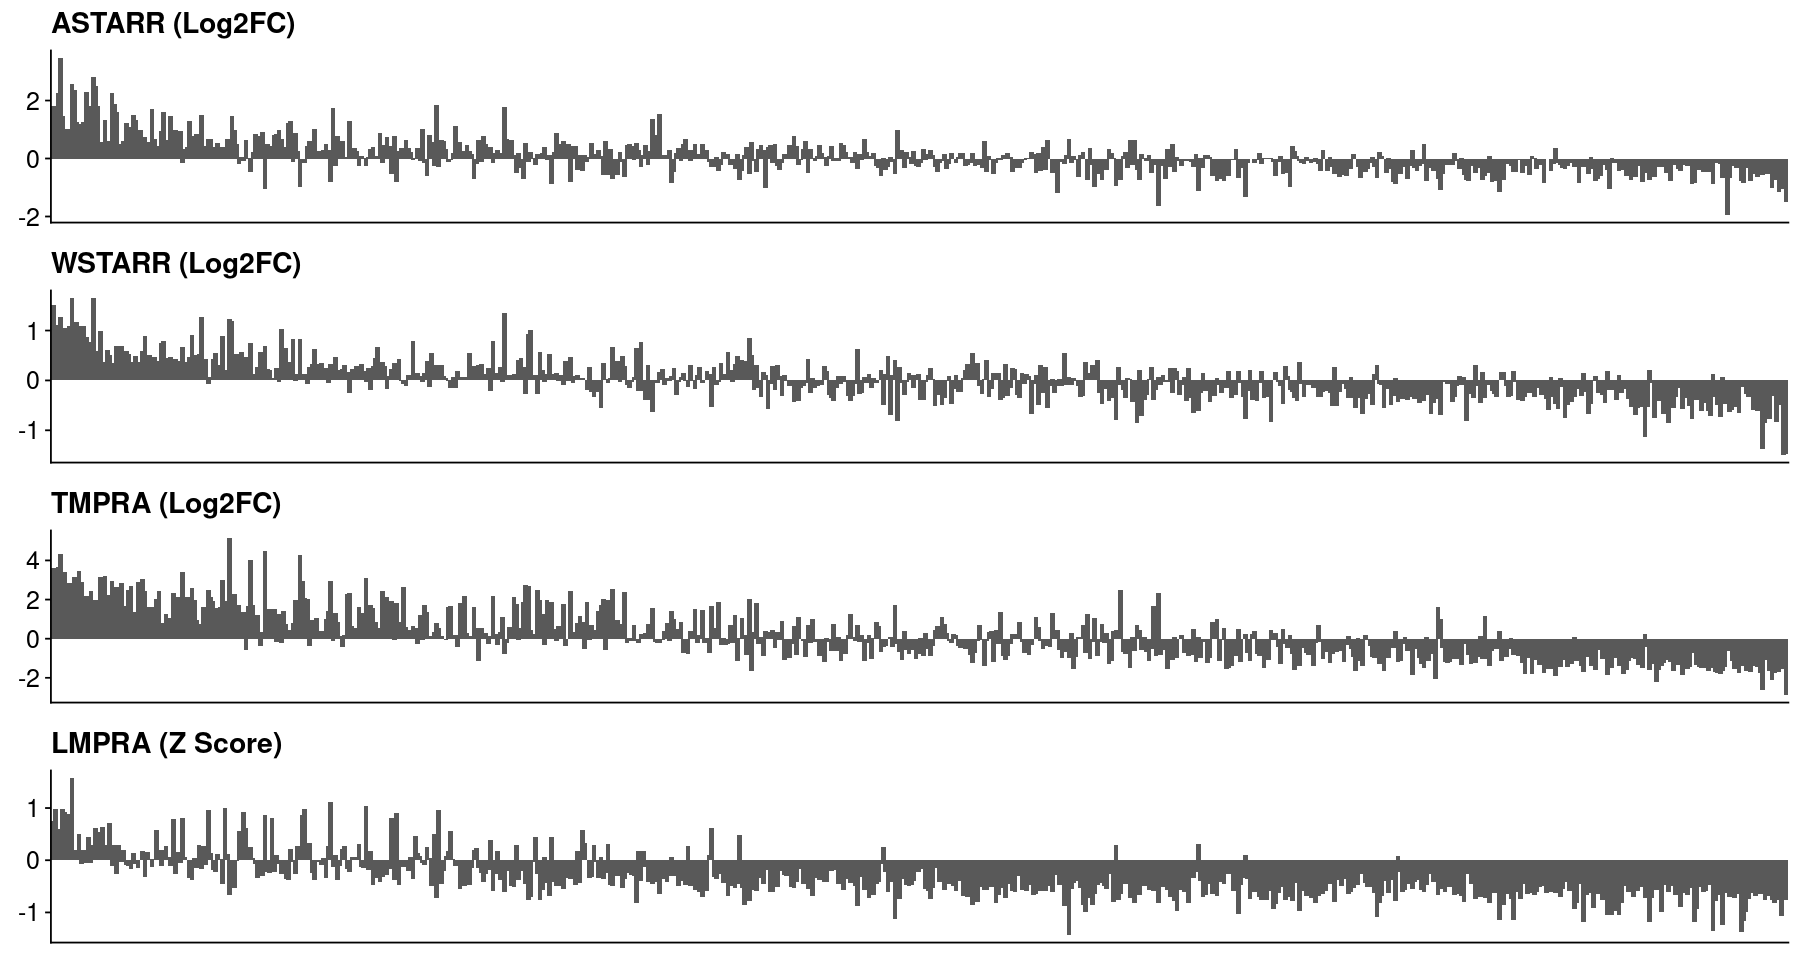

In [30]:
idx = "fcc_astarr_macs_input_overlap"
lol = lol_gpt_region_score_starrmpra
lst = lol[[idx]]
plt = plot_grid(plotlist = lst, ncol = 1, align = "v")

options(repr.plot.height=8, repr.plot.width=15)
print(plt)

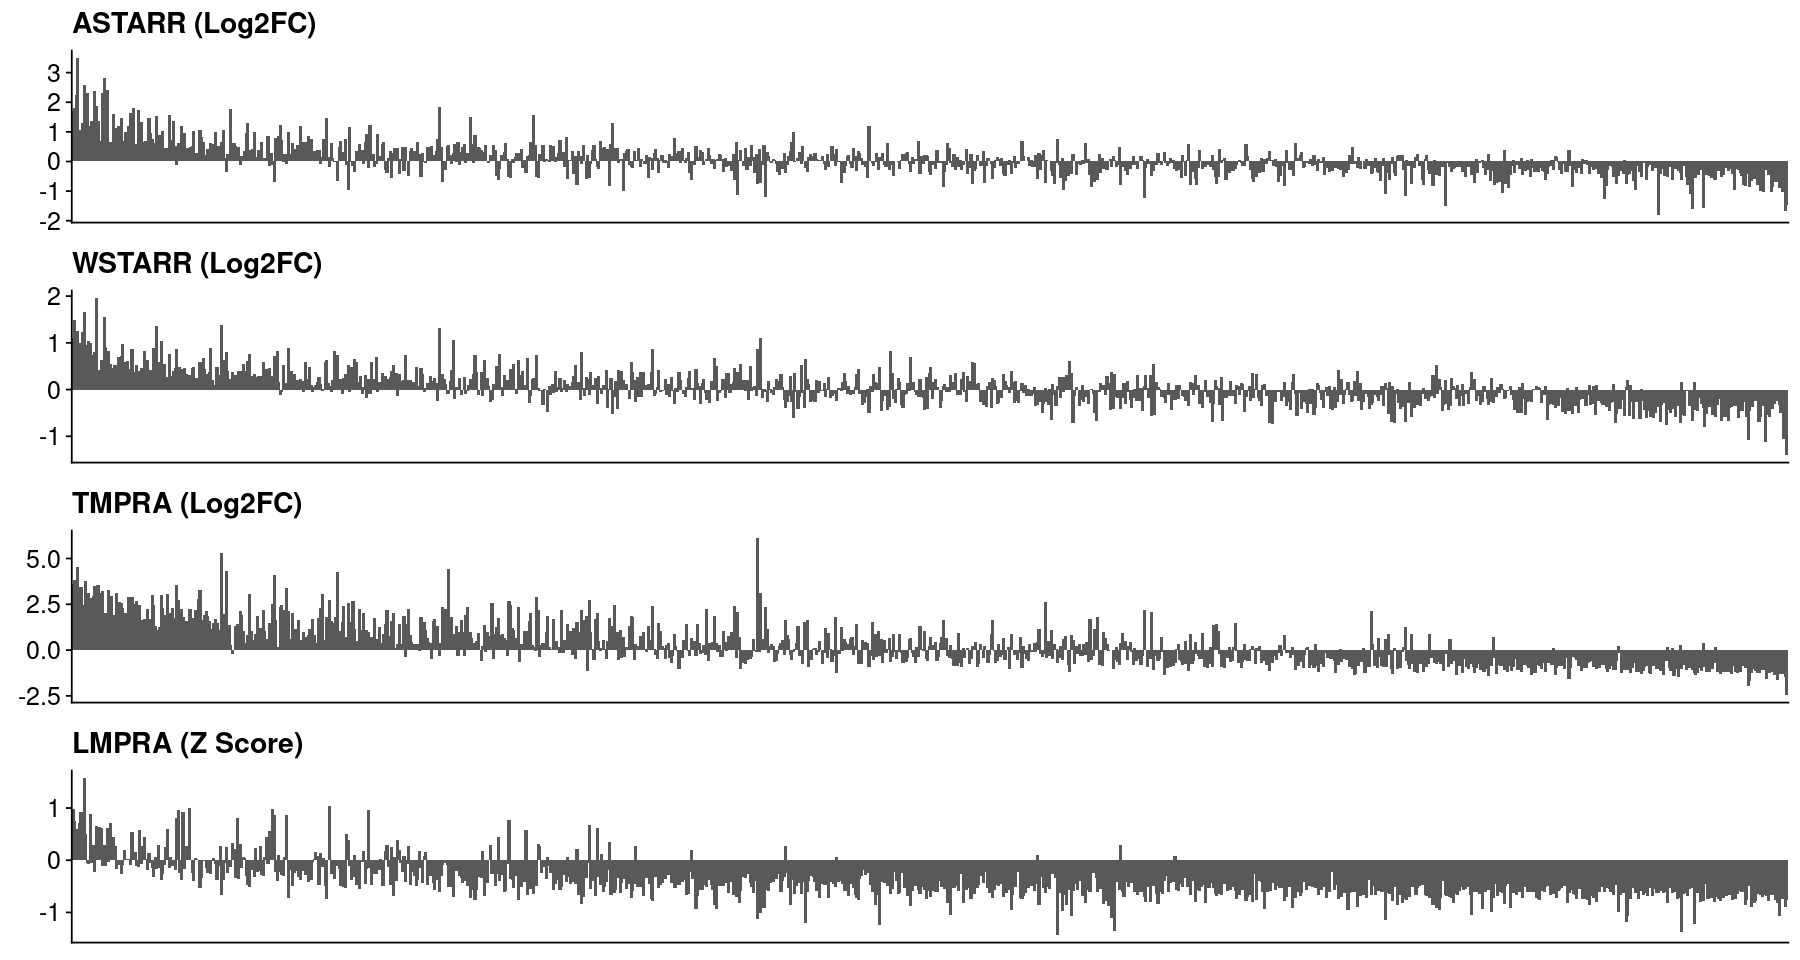

In [31]:
idx = "fcc_astarr_macs_input_union"
lol = lol_gpt_region_score_starrmpra
lst = lol[[idx]]
plt = plot_grid(plotlist = lst, ncol = 1, align = "v")

options(repr.plot.height=8, repr.plot.width=15)
print(plt)

## Plot CRISPRi-HCRFF

**Arrange tables**

In [32]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### get the order of regions
    vec_txt_region = lst_vec_txt_region_sorted[[txt_folder]]

    ### get tables
    dat_region_score   = lst_dat_region_score_chcrff_import[[txt_folder]]
    dat_region_overlap = lst_dat_region_overlap[[txt_folder]]
    
    ### get score columns
    dat = dat_region_score %>% 
        dplyr::select(Region, Mean_Pos, Mean_Neg) %>%
        dplyr::right_join(dat_region_overlap, by = "Region")

    ### arrange the table
    dat = dat %>% 
        tidyr::gather(Group, Score, -Chrom, -ChromStart, -ChromEnd, -Region) %>%
        dplyr::select(Chrom, ChromStart, ChromEnd, Region, Group, Score) %>%
        dplyr::mutate(Region = factor(Region, levels=vec_txt_region)) %>%
        replace(is.na(.), 0)
    return(dat)
})

### assign and show
lst_dat_region_score_chcrff_arrange = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 1476    6

$fcc_astarr_macs_input_union
[1] 2220    6



Chrom,ChromStart,ChromEnd,Region,Group,Score
<chr>,<dbl>,<dbl>,<fct>,<chr>,<dbl>
chr11,4626130,4626649,chr11:4626130-4626649,Mean_Pos,0.113559393
chr11,4636808,4637676,chr11:4636808-4637676,Mean_Pos,0.002813175
chr11,4658501,4659553,chr11:4658501-4659553,Mean_Pos,0.036087434


**Generate plots**

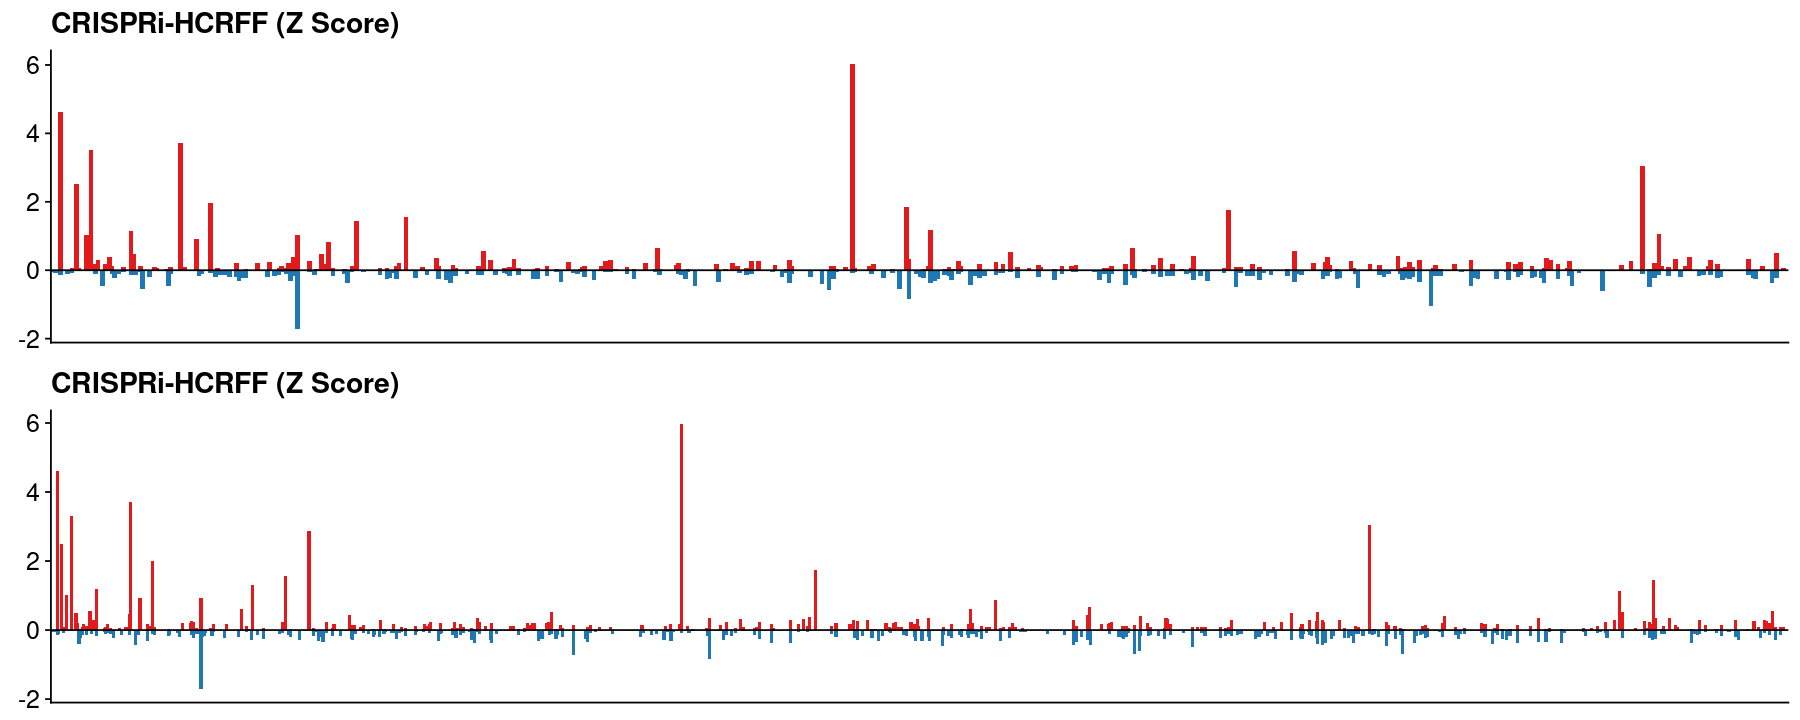

In [33]:
### set plot style
theme_fill = scale_fill_manual(
    values = c(
        "Mean_Pos"="#e31a1c", 
        "Mean_Neg"="#1f78b4"
    )
)
theme_text   = THEME_TEXT
theme_legend = theme(legend.position = "none")

### generate the plot
lst = lst_dat_region_score_chcrff_arrange
lst = lapply(lst, function(dat){
    gpt = ggplot(dat, aes(x=Region, y=Score, fill=Group)) + 
        geom_col(width=2, position="identity") + 
        geom_hline(yintercept = 0) +
        labs(title = "CRISPRi-HCRFF (Z Score)") +
        theme_cowplot() + 
        theme_text +
        theme_fill +
        theme_legend    
})

### assign and show
lst_gpt_region_score_chcrff = lst

options(repr.plot.height=6, repr.plot.width=15)
plot_grid(plotlist = lst, ncol = 1)

## Plot CRISPRi-Growth

**Arrange tables**

In [34]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### get the order of region
    vec_txt_region = lst_vec_txt_region_sorted[[txt_folder]]

    ### get tables
    dat_region_score   = lst_dat_region_score_cgrowth_import[[txt_folder]]
    dat_region_overlap = lst_dat_region_overlap[[txt_folder]]
    
    ### get score column
    dat = dat_region_score %>% 
        dplyr::select(Region, Mean) %>%
        dplyr::right_join(dat_region_overlap, by = "Region")

    ### arrange the table
    dat = dat %>% 
        tidyr::gather(Group, Score, -Chrom, -ChromStart, -ChromEnd, -Region) %>%
        dplyr::select(Chrom, ChromStart, ChromEnd, Region, Group, Score) %>%
        dplyr::mutate(Region = factor(Region, levels=vec_txt_region)) %>%
        replace(is.na(.), 0)
    return(dat)
})

### assign and show
lst_dat_region_score_cgrowth_arrange = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 738   6

$fcc_astarr_macs_input_union
[1] 1110    6



Chrom,ChromStart,ChromEnd,Region,Group,Score
<chr>,<dbl>,<dbl>,<fct>,<chr>,<dbl>
chr11,4551522,4551988,chr11:4551522-4551988,Mean,-0.0058791
chr11,4626130,4626649,chr11:4626130-4626649,Mean,-0.1132086
chr11,4636808,4637676,chr11:4636808-4637676,Mean,0.0212365


**Generate plots**

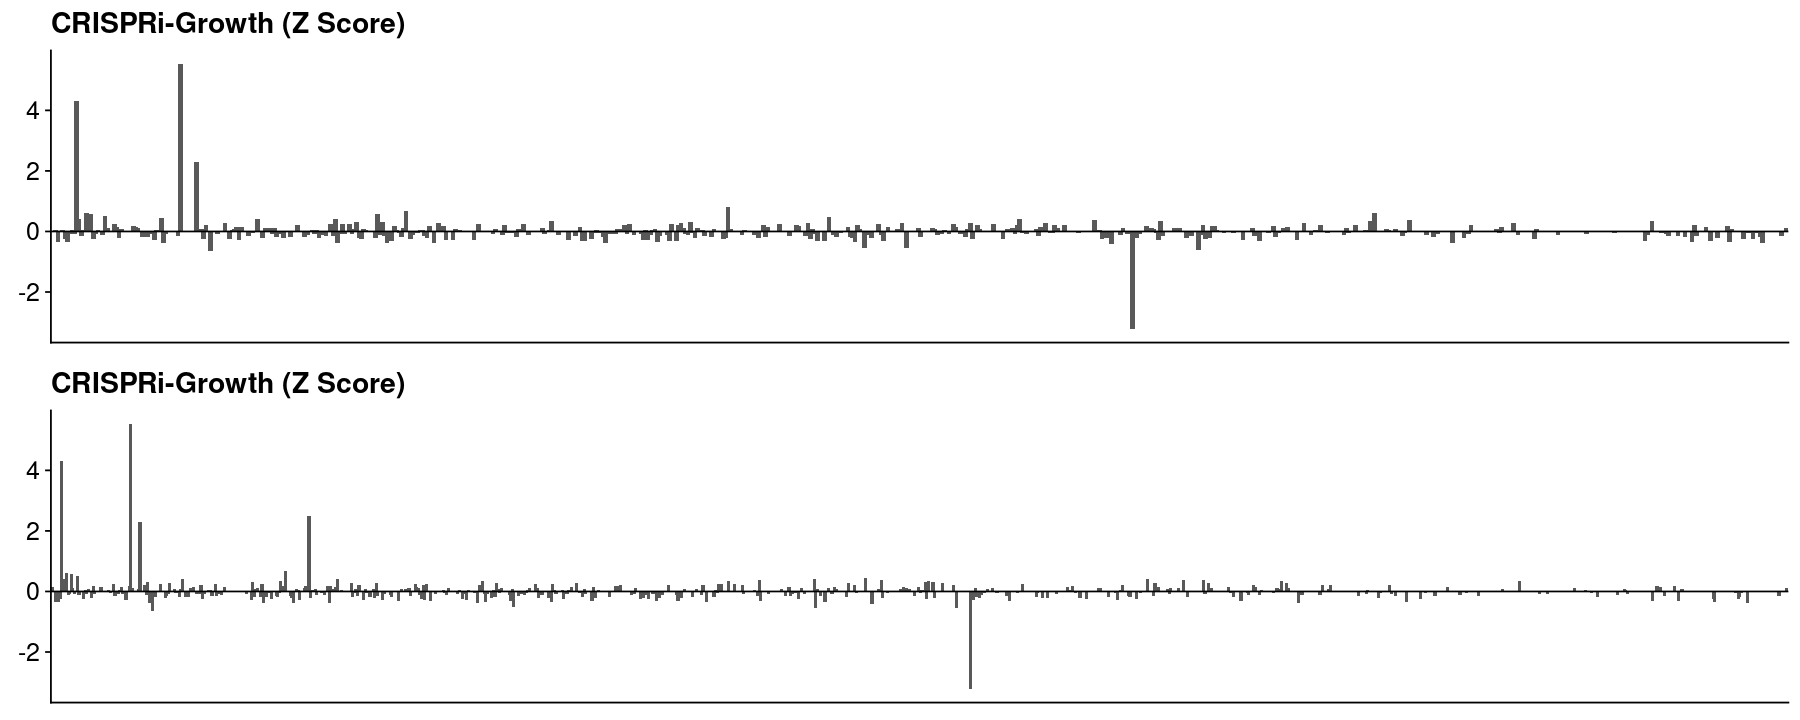

In [35]:
### set plot style
theme_text = THEME_TEXT
theme_legend = theme(legend.position = "none")

### generate plot
lst = lst_dat_region_score_cgrowth_arrange
lst = lapply(lst, function(dat){
    gpt = ggplot(dat, aes(x=Region, y=Score)) + 
        geom_col(width=2, position="identity") +
        geom_hline(yintercept = 0) +
        labs(title = "CRISPRi-Growth (Z Score)") +
        theme_cowplot() + 
        theme_text +
        theme_legend
    return(gpt)    
})

### assign and show
lst_gpt_region_score_cgrowth = lst

options(repr.plot.height=6, repr.plot.width=15)
plot_grid(plotlist = lst, ncol = 1)

## Plot ENCODE-E2G Benchmark

**Arrange tables**

In [36]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### get the order of region
    vec_txt_region = lst_vec_txt_region_sorted[[txt_folder]]

    ### get tables
    dat_region_score   = lst_dat_region_score_e2g_import[[txt_folder]]
    dat_region_overlap = lst_dat_region_overlap[[txt_folder]]
    
    ### get score columns
    dat = dat_region_score %>% 
        dplyr::select(Region, Mean_Pos, Mean_Neg) %>%
        dplyr::right_join(dat_region_overlap, by = "Region")

    ### arrange the table
    dat = dat %>% 
        tidyr::gather(Group, Score, -Chrom, -ChromStart, -ChromEnd, -Region) %>%
        dplyr::select(Chrom, ChromStart, ChromEnd, Region, Group, Score) %>%
        dplyr::mutate(Region = factor(Region, levels=vec_txt_region)) %>%
        replace(is.na(.), 0)
    return(dat)
})

### assign and show
lst_dat_region_score_e2g_arrange = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 1476    6

$fcc_astarr_macs_input_union
[1] 2220    6



Chrom,ChromStart,ChromEnd,Region,Group,Score
<chr>,<dbl>,<dbl>,<fct>,<chr>,<dbl>
chr11,4626130,4626649,chr11:4626130-4626649,Mean_Pos,0.7999168
chr11,4636808,4637676,chr11:4636808-4637676,Mean_Pos,1.0617301
chr11,4658501,4659553,chr11:4658501-4659553,Mean_Pos,1.3426116


**Generate plots**

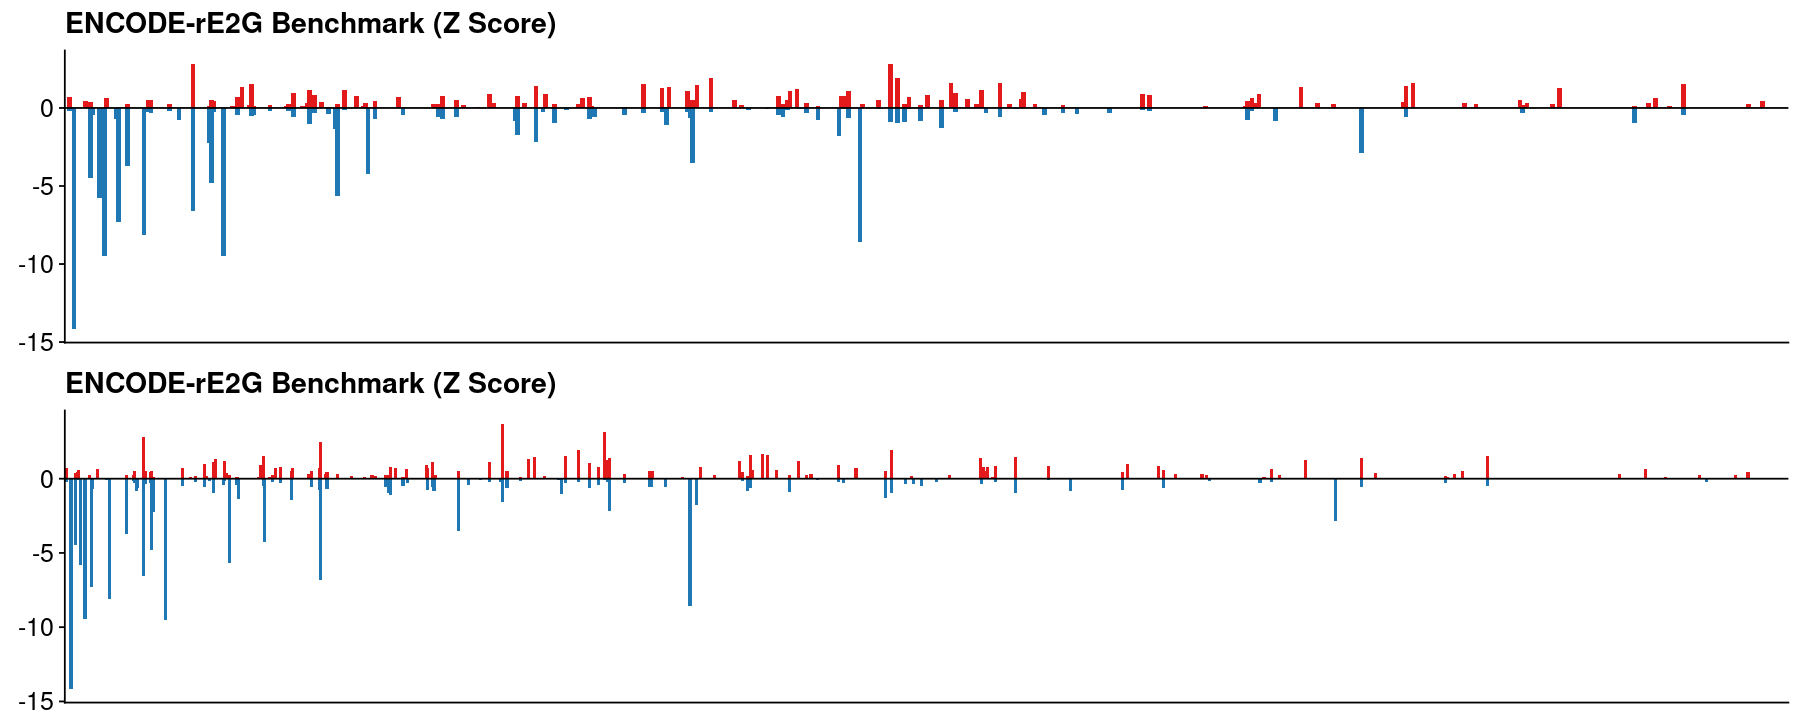

In [37]:
### set plot style
theme_fill = scale_fill_manual(
    values = c(
        "Mean_Pos"="#e31a1c", 
        "Mean_Neg"="#1f78b4"
    )
)
theme_text   = THEME_TEXT
theme_legend = theme(legend.position = "none")

### generate plot
lst = lst_dat_region_score_e2g_arrange
lst = lapply(lst, function(dat){
    gpt = ggplot(dat, aes(x=Region, y=Score, fill=Group)) + 
        geom_col(width=2, position="identity") + 
        geom_hline(yintercept = 0) +
        labs(title = "ENCODE-rE2G Benchmark (Z Score)") +
        theme_cowplot() + 
        theme_text +
        theme_fill +
        theme_legend #+
        #scale_y_continuous(breaks = c(, -10, -5 , -2, 0, 2, 4))
})

### assign and show
lst_gpt_region_score_e2g = lst

options(repr.plot.height=6, repr.plot.width=15)
plot_grid(plotlist = lst, ncol = 1)

## Plot ATAC

**Arrange tables**

In [38]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### get the order of region
    vec_txt_region = lst_vec_txt_region_sorted[[txt_folder]]

    ### get tables
    dat_region_score   = lst_dat_region_score_atac_import[[txt_folder]]
    dat_region_overlap = lst_dat_region_overlap[[txt_folder]]
    
    ### get score column
    dat = dat_region_score %>% 
        dplyr::select(Region, Score) %>%
        dplyr::right_join(dat_region_overlap, by = "Region")

    ### arrange the table
    dat = dat %>% 
        dplyr::mutate(Region = factor(Region, levels=vec_txt_region)) %>%
        replace(is.na(.), 0)
    return(dat)
})

### assign and show
lst_dat_region_score_atac_arrange = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 738   5

$fcc_astarr_macs_input_union
[1] 1110    5



Region,Score,Chrom,ChromStart,ChromEnd
<fct>,<dbl>,<chr>,<dbl>,<dbl>
chr11:4551522-4551988,2.956600,chr11,4551522,4551988
chr11:4554256-4554817,2.446208,chr11,4554256,4554817
chr11:4619533-4619914,4.323324,chr11,4619533,4619914


**Generate plots**

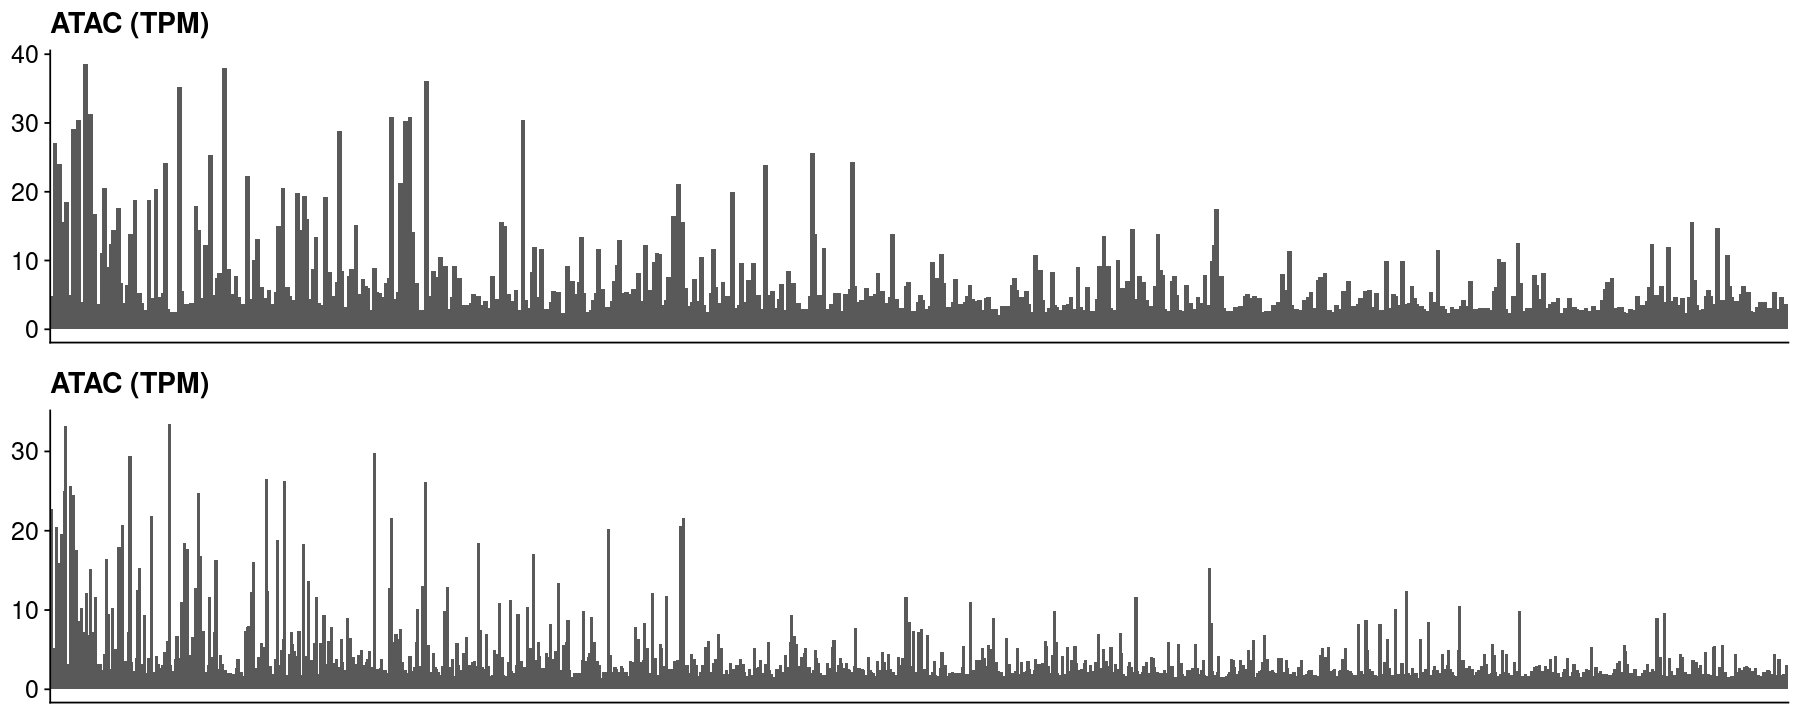

In [39]:
### set plot style
theme_text   = THEME_TEXT
theme_legend = theme(legend.position = "none")

### generate plot
lst = lst_dat_region_score_atac_arrange
lst = lapply(lst, function(dat){
    gpt = ggplot(dat, aes(x=Region, y=Score)) + 
        geom_col(width=2, position="identity") +
        labs(title = "ATAC (TPM)") +
        theme_cowplot() + 
        theme_text +
        theme_legend
    return(gpt)    
})

### assign and show
lst_gpt_region_score_atac = lst

options(repr.plot.height=6, repr.plot.width=15)
plot_grid(plotlist = lst, ncol = 1)

## Combine plots of all assays

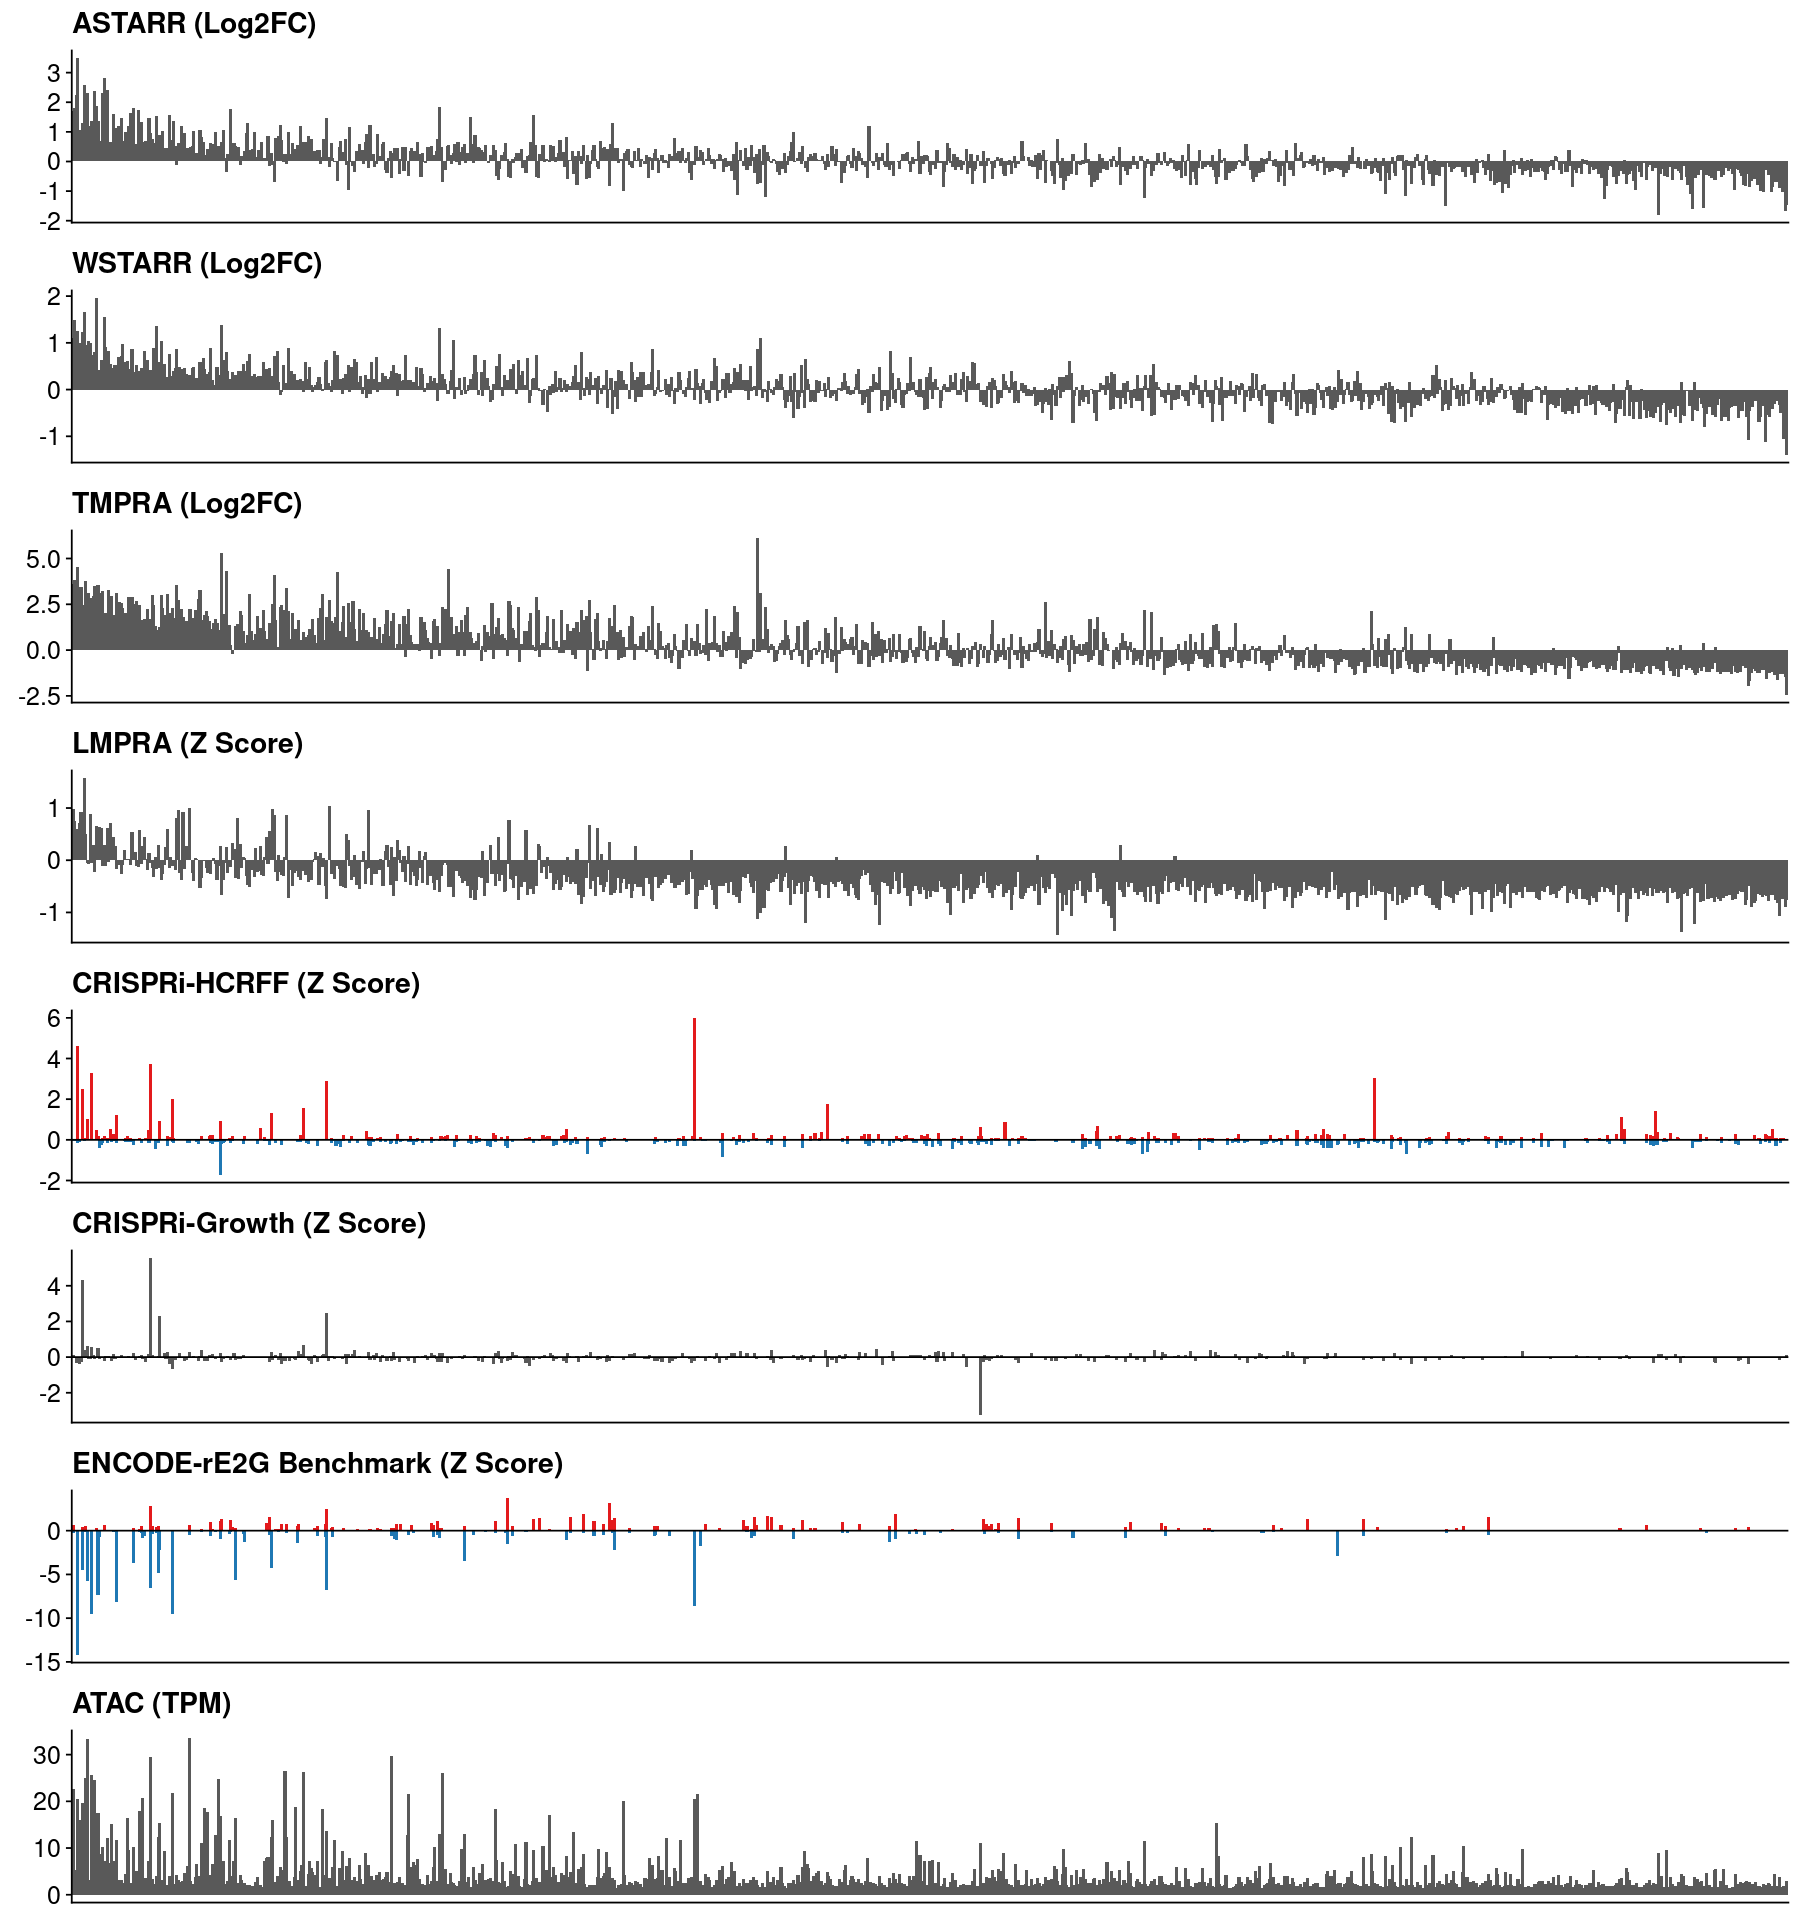

In [47]:
### get list of STARR/MPRA plots
idx = "fcc_astarr_macs_input_union"
lol = lol_gpt_region_score_starrmpra
lst = lol[[idx]]
lst_gpt_region_score_starrmpra = lst

### get list of CRISPR/ATAC plots
idx = "fcc_astarr_macs_input_union"
lst = list(
    lst_gpt_region_score_chcrff[[idx]],
    lst_gpt_region_score_cgrowth[[idx]],
    lst_gpt_region_score_e2g[[idx]],
    lst_gpt_region_score_atac[[idx]]
)
lst_gpt_region_score_other = lst

### combine list
lst = c(
    lst_gpt_region_score_starrmpra,
    lst_gpt_region_score_other
)

### generate plot
vec = rep(1, 8)
plt = plot_grid(
    plotlist    = lst, 
    rel_heights = vec,
    ncol  = 1,
    align = "v"
)

### assign and show
plt_region_score_combine = plt
vec_ratio_score_combine  = vec
options(repr.plot.height=sum(vec)*2, repr.plot.width=15)
print(plt)

## Label regions

**Arrange table**

In [48]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### get regions
    vec_txt_region = lst_vec_txt_region_sorted[[txt_folder]]

    ### get table and arrange
    dat = lst_dat_region_annot_cres_import[[txt_folder]]
    dat = dat %>% 
        dplyr::filter(Region %in% vec_txt_region) %>%
        dplyr::mutate(Region = factor(Region, levels=vec_txt_region)) %>%
        dplyr::arrange(Region)
    return(dat)
})

### assign and show
lst_dat_region_annot_cres_arrange = lst

res = lapply(lst, dim)
print(res)

vec = lst[[1]]
head(vec, 3)

$fcc_astarr_macs_input_overlap
[1] 14 12

$fcc_astarr_macs_input_union
[1] 15 12



Chrom,ChromStart,ChromEnd,Region,Region_CRE,Group,Label,Type,Target,Description,Reference,Note
<chr>,<dbl>,<dbl>,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
chr11,5280584,5281266,chr11:5280584-5281266,chr11:5280585-5281266,genome_cres,LCR HS2,enhancer,HBE1,locus control region HS2,NA,known CREs
chr11,33941507,33942212,chr11:33941507-33942212,chr11:33941508-33942212,genome_cres,LMO2 CRE 3,enhancer,LMO2,LMO2 CRE 3,"Reilly et al., 2021",known CREs
chr8,127898375,127899697,chr8:127898375-127899697,chr8:127898376-127899697,genome_cres,MYC E1,enhancer,MYC,intragenic enhancer within PVT1,"Fulco et al., 2016; Reilly et al., 2021",known CREs


**Label the regions at ATAC**

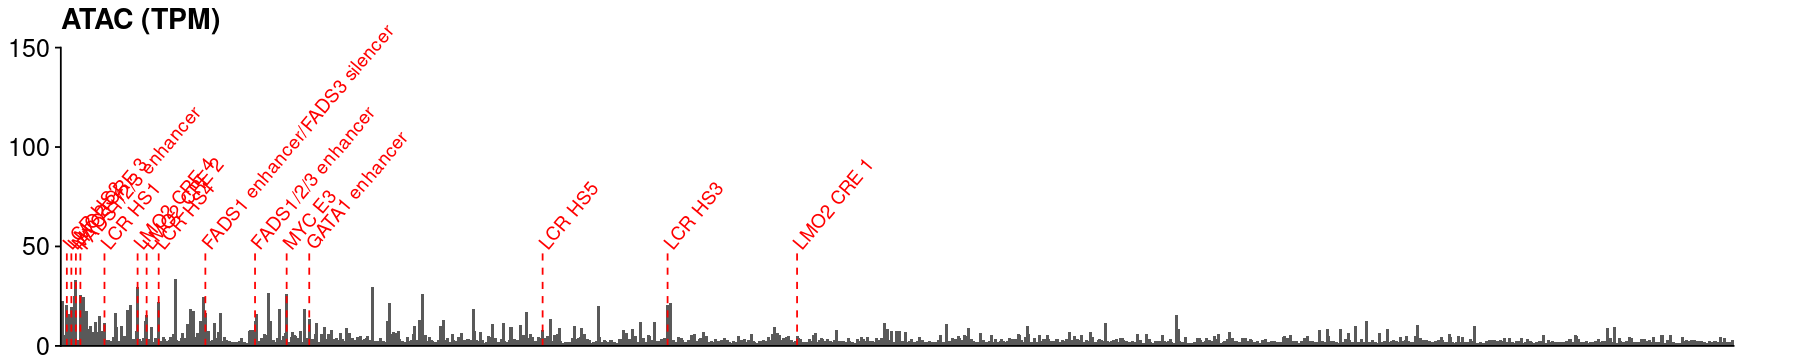

In [49]:
### get the labeled regions and plot
idx = "fcc_astarr_macs_input_union"

lst = lst_gpt_region_score_atac
gpt = lst[[idx]]

lst = lst_dat_region_annot_cres_arrange
dat = lst[[idx]]

### update the plot with labeled regions
gpt = gpt + 
    geom_segment(
        aes(x    = Region, 
            xend = Region, 
            y    = 0,          
            yend = 50
        ),         
        data      = dat,
        colour    = "red",
        linewidth = 0.5,
        linetype  = "dashed",
        inherit.aes = FALSE,
    ) +
    annotate(
        "text",
        x      = dat$Region,
        y      = 50,        # just above the tallest bar
        label  = dat$Label,
        angle  = 50,        # rotate text
        vjust  = 0.5,       # 0 = bottom, 1 = top of text
        hjust  = 0,         # adjust left/right if needed
        size   = 4,
        colour = "red"
    ) +
    # extend the y‐axis so there is room for the label
    scale_y_continuous(expand = expansion(mult = c(0, 2)))

### allow label to exceed the margine
gpt = gpt +
    coord_cartesian(clip = "off") +
    theme(plot.margin = margin(t = 5, r = 40, b = 5, l = 5, unit = "pt"))

### assign and show
gpt_region_score_atac_label_cres = gpt
options(repr.plot.height=3, repr.plot.width=15)
print(gpt)

**Test verticle lines**

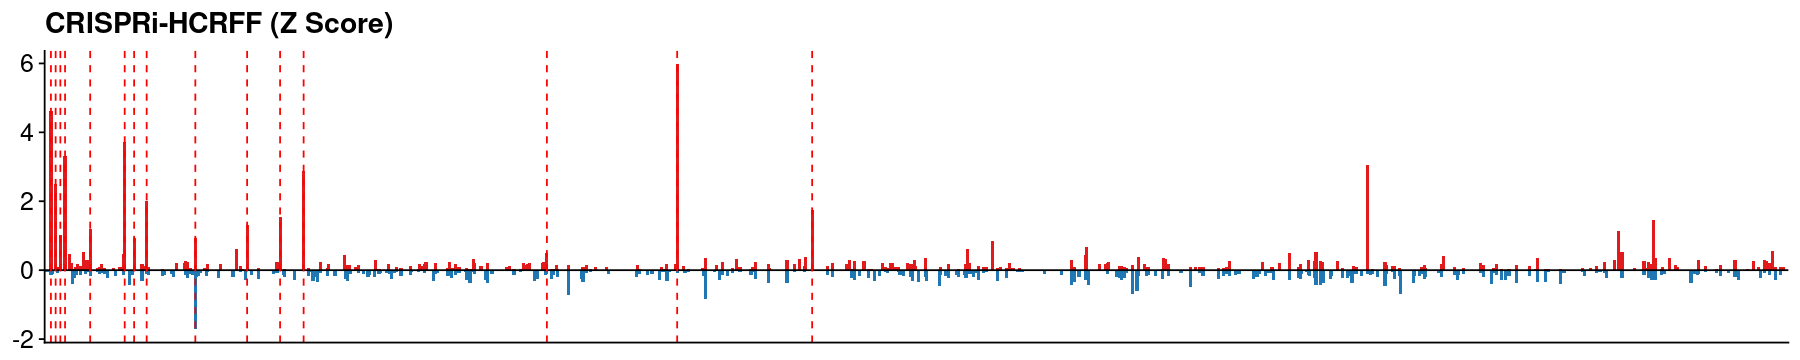

In [50]:
### get the labeled regions and plot
idx = "fcc_astarr_macs_input_union"

lst = lst_gpt_region_score_chcrff
gpt = lst[[idx]]

lst = lst_dat_region_annot_cres_arrange
dat = lst[[idx]]

### update the plot with labled regions
gpt = gpt + 
    geom_vline(
        xintercept = dat$Region,
        colour     = "red",
        linewidth  = 0.5,
        linetype   = "dashed"
    ) 

### show the plot
options(repr.plot.height=3, repr.plot.width=15)
print(gpt)

**Set verticle lines**

In [51]:
### get the labeled regions
idx = "fcc_astarr_macs_input_union"
lst = lst_dat_region_annot_cres_arrange
dat = lst[[idx]]

### setup the line theme
gpt_add_line = geom_vline(
    xintercept = dat$Region,
    colour     = "red",
    linewidth  = 0.5,
    linetype   = "dashed"
) 

**Update the combine figure**

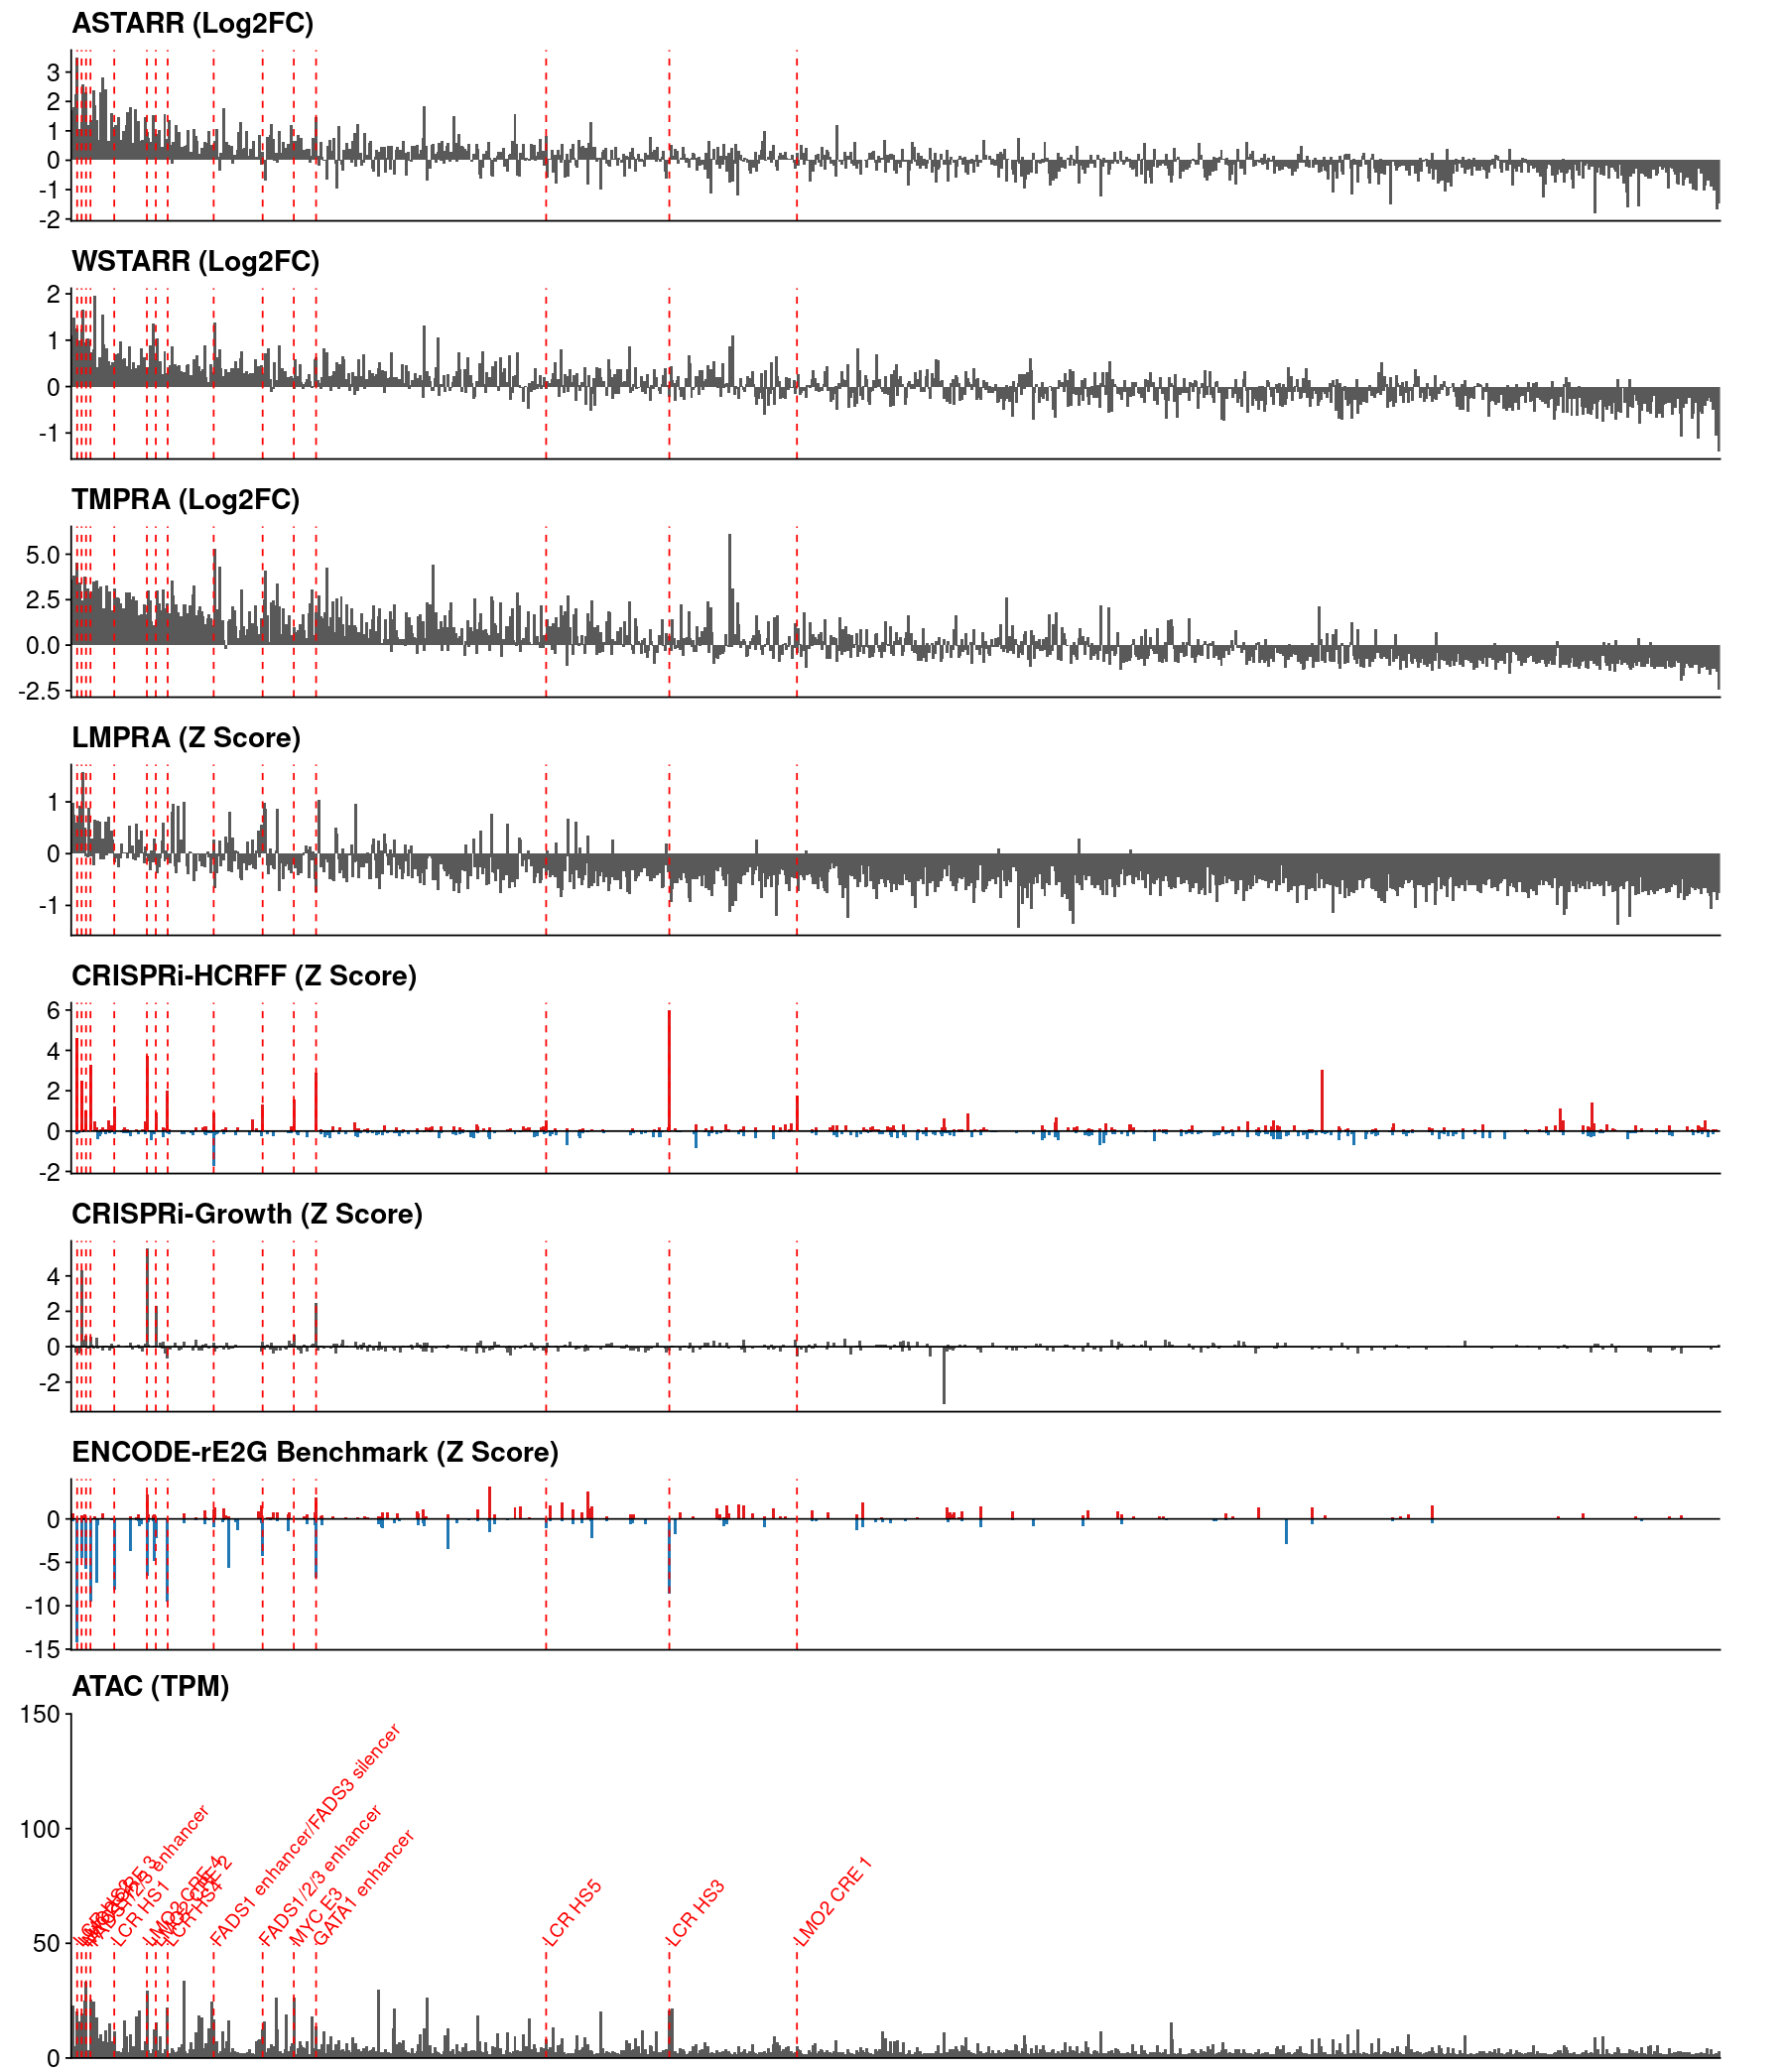

In [52]:
### get list of STARR/MPRA plots
idx = "fcc_astarr_macs_input_union"
lol = lol_gpt_region_score_starrmpra
lst = lol[[idx]]
lst = lapply(lst, function(gpt){
    gpt = gpt + gpt_add_line
    return(gpt)
})
lst_gpt_region_score_starrmpra = lst

### get list of CRISPR/ATAC plots
idx = "fcc_astarr_macs_input_union"
lst = list(
    lst_gpt_region_score_chcrff[[idx]]  + gpt_add_line,
    lst_gpt_region_score_cgrowth[[idx]] + gpt_add_line,
    lst_gpt_region_score_e2g[[idx]]     + gpt_add_line,
    gpt_region_score_atac_label_cres
)
lst_gpt_region_score_other = lst

### combine list and update plots
lst = c(
    lst_gpt_region_score_starrmpra,
    lst_gpt_region_score_other
)

### generate plot
vec = c(rep(1, 7), 1.7)
plt = plot_grid(
    plotlist    = lst, 
    rel_heights = vec,
    ncol  = 1,
    align = "v"
)

### assign and show
plt_region_score_combine_label_cres = plt
vec_ratio_score_combine_label_cres  = vec
options(repr.plot.height=sum(vec)*2, repr.plot.width=15)
print(plt)

## Save plot

In [53]:
plt_export = plt_region_score_combine
vec_export = vec_ratio_score_combine
txt_export = "fig.region_coverage_fcc.combine.starrmpra_log2fc.crispri.encode_e2g_benchmark.atac.distal"
num_height = sum(vec_export)*2
num_width  = 15

txt_fdiry = "./"
txt_fname = paste(txt_export, "png", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
#ggsave(txt_fpath, plt_export, height = num_height, width = num_width, units = "in")

txt_fdiry = "./"
txt_fname = paste(txt_export, "svg", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
#ggsave(txt_fpath, plt_export, height = num_height, width = num_width, units = "in")

In [54]:
plt_export = plt_region_score_combine_label_cres
vec_export = vec_ratio_score_combine_label_cres
txt_export = "fig.region_coverage_fcc.combine.starrmpra_log2fc.crispri.encode_e2g_benchmark.atac.distal.label_cres"
num_height = sum(vec_export)*2
num_width  = 15

txt_fdiry = "./"
txt_fname = paste(txt_export, "png", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
#ggsave(txt_fpath, plt_export, height = num_height, width = num_width, units = "in")

txt_fdiry = "./"
txt_fname = paste(txt_export, "svg", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
#ggsave(txt_fpath, plt_export, height = num_height, width = num_width, units = "in")